<h2>Case: Analyzing Climate Data for a Smart City Project</h2>

In [14]:
import numpy as np

# Load CSV using NumPy
data = np.loadtxt('temp_data.csv', delimiter=",", skiprows=1)
print(data)


[[22.5 23.1 21.9 24.  22.8]
 [23.  23.5 22.2 24.3 23.1]
 [21.8 22.4 21.5 23.  22. ]
 [22.2 23.  21.7 23.7 22.5]
 [23.1 23.6 22.5 24.2 23. ]
 [21.9 22.5 21.2 22.9 21.8]
 [22.7 23.3 22.  23.8 22.6]
 [23.2 23.8 22.7 24.4 23.3]
 [21.7 22.3 21.  22.7 21.6]
 [22.  22.7 21.3 23.  22.1]
 [23.  23.6 22.4 24.1 22.9]
 [22.4 23.  21.8 23.4 22.4]
 [22.8 23.3 22.1 23.9 22.7]
 [21.6 22.2 20.9 22.6 21.5]
 [22.1 22.8 21.4 23.1 22. ]
 [23.3 23.9 22.8 24.5 23.4]
 [21.5 22.  20.8 22.5 21.3]
 [22.3 23.1 21.6 23.6 22.3]
 [22.9 23.4 22.3 24.  22.8]
 [21.8 22.3 21.1 22.8 21.7]
 [22.6 23.2 22.  23.7 22.6]
 [23.1 23.7 22.6 24.3 23.2]
 [21.9 22.4 21.2 22.9 21.9]
 [22.5 23.1 21.9 23.8 22.5]
 [23.2 23.8 22.7 24.4 23.3]
 [21.7 22.3 21.  22.7 21.6]
 [22.  22.6 21.3 23.  22.1]
 [23.  23.5 22.4 24.1 22.9]
 [22.3 23.  21.7 23.5 22.4]
 [22.7 23.3 22.  23.9 22.7]]


In [13]:
# Daily averages (1 value per day, already implicit in each row)
daily_avg = np.mean(data, axis=1)

# Monthly average (assume 30 rows = 1 month)
monthly_avg = np.mean(data, axis=0)

# Yearly average (if we had 365 days, we would do something like:)
# yearly_avg = np.mean(data.reshape(-1, 365, data.shape[1]), axis=1)

print("Daily Average:",daily_avg)
print("Monthly Average:",monthly_avg)

Daily Average: [22.86 23.22 22.14 22.62 23.28 22.06 22.88 23.48 21.86 22.22 23.2  22.6
 22.96 21.76 22.28 23.58 21.62 22.58 23.08 21.94 22.82 23.38 22.06 22.76
 23.48 21.86 22.2  23.18 22.58 22.92]
Monthly Average: [22.42666667 23.02333333 21.8        23.56       22.43333333]


In [11]:
# Detect outliers beyond 2 standard deviations
mean = np.mean(data)
std = np.std(data)

# Mask of outliers
outliers = np.abs(data - mean) > 2 * std
outlier_indices = np.argwhere(outliers)

print('Mean:',mean)
print("Standard Deviation:",std)

Mean: 22.648666666666667
Standard Deviation: 0.8277468748892314


In [6]:
from sklearn.ensemble import IsolationForest

# Anomaly detection with ML
model = IsolationForest(contamination=0.1, random_state=42)
labels = model.fit_predict(data)  # -1 = outlier, 1 = normal


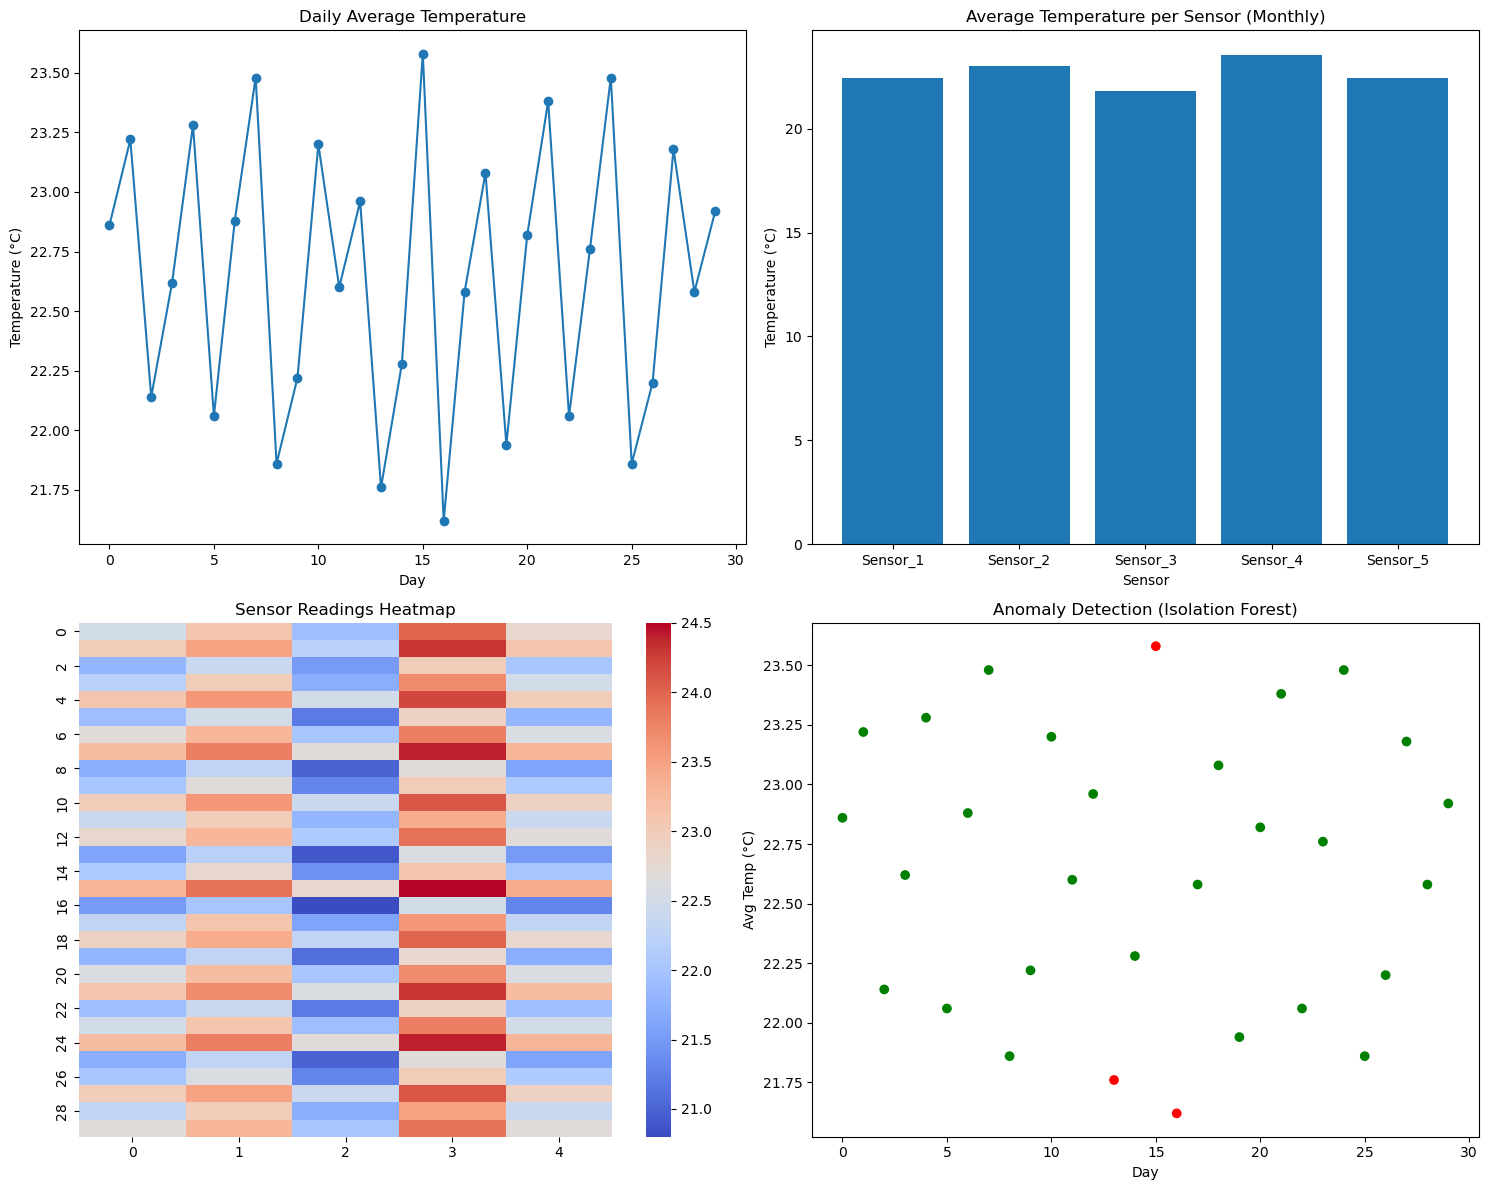

In [16]:
# 5. Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 12))

# Daily averages
plt.subplot(2, 2, 1)
plt.plot(daily_avg, marker='o')
plt.title("Daily Average Temperature")
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")

# Monthly averages per sensor
plt.subplot(2, 2, 2)
plt.bar(range(1, 6), monthly_avg)
plt.title("Average Temperature per Sensor (Monthly)")
plt.xlabel("Sensor")
plt.ylabel("Temperature (°C)")
plt.xticks(ticks=range(1, 6), labels=[f"Sensor_{i}" for i in range(1, 6)])

# Heatmap of data
plt.subplot(2, 2, 3)
sns.heatmap(data, annot=False, cmap="coolwarm", cbar=True)
plt.title("Sensor Readings Heatmap")

# Isolation Forest results
plt.subplot(2, 2, 4)
colors = ['red' if label == -1 else 'green' for label in labels]
plt.scatter(range(len(labels)), daily_avg, c=colors)
plt.title("Anomaly Detection (Isolation Forest)")
plt.xlabel("Day")
plt.ylabel("Avg Temp (°C)")

plt.tight_layout()
plt.show()